# Characterizing Spontaneous Thought: Brain Meta-State Transitions in Anaesthetized Non-Human Primates
*Abhay Katoch*

*Friday, November 8th, 2024*

### Potential Problems
1. **tSNE has variable outputs:** Identifying metrics of meta-state transitions (*e.g.,* number of 'jumps' according to Mahalanobis distance) requires data that doesn't vary across runs.
    - This can be mitigated through using set seed values and then aggregating analyses across multiple runs.

In [9]:
# Loading Libraries
import numpy as np
import os
from matplotlib import pyplot as plt

from functions.reduce_dimensions import reduce_dim, calculate_jumps

In [10]:
data_1 = np.genfromtxt('data/macaques/M6/subject_M6_scan_1.csv', delimiter=',', dtype=None)
data_12 = np.genfromtxt('data/macaques/M6/subject_M6_scan_12.csv', delimiter=',', dtype=None)

In [39]:
marm_data_1 = np.loadtxt('/Users/abhay/Documents/School/Thesis/project/data/marmosets/01/sub-01_condition-awake_scan-17_dtype_volreg_trans_timeseries.tsv', delimiter='\t', skiprows=1)
marm_data_2 = np.loadtxt('/Users/abhay/Documents/School/Thesis/project/data/marmosets/01/sub-01_condition-anest_scan-18_dtype_volreg_trans_timeseries.tsv', delimiter='\t', skiprows=1)

In [122]:
marmoset_dir = "/Users/abhay/Documents/School/Thesis/project/data/macaques/M4"

dataset = {}
for i, f in enumerate(os.listdir(marmoset_dir)):
    if d.startswith("."):
        continue

    path = os.path.join(marmoset_dir, f)
    data = np.loadtxt(path, delimiter=',')
    dataset[f'{i}'] = data

In [91]:
dataset['0'].shape

(150, 174)

In [123]:
full_data = np.concatenate([dataset[x] for x in sorted(dataset)], 0)

In [124]:
full_tsne_output = reduce_dim(full_data, 5)

In [125]:
# Split the array into 12 parts along the first axis
split_data = np.split(full_tsne_output, 12, axis=0)

# Create a dictionary with keys "array_0", "array_1", ..., "array_11"
sep_dataset = {f"array_{i}": split_data[i] for i in range(12)}

In [95]:
full_peaks, full_rate = calculate_jumps(full_tsne_output)

In [103]:
sep_dataset

{'array_0': array([[ 1.44553204e+01, -5.43801079e+01],
        [ 1.41140013e+01, -5.44041367e+01],
        [ 1.34207563e+01, -5.44418030e+01],
        [ 1.25615377e+01, -5.45033913e+01],
        [ 1.17375412e+01, -5.45615273e+01],
        [ 1.09008064e+01, -5.45836716e+01],
        [ 1.02398243e+01, -5.45497398e+01],
        [-1.41804314e+01,  4.15774202e+00],
        [-1.45313635e+01,  4.39810514e+00],
        [-3.94024353e+01,  1.30175848e+01],
        [-3.92668152e+01,  1.36502542e+01],
        [-3.89867439e+01,  1.42875319e+01],
        [-3.85110397e+01,  1.49213266e+01],
        [-3.78836899e+01,  1.55083857e+01],
        [-3.71784439e+01,  1.59279890e+01],
        [-3.63881035e+01,  1.61043262e+01],
        [-3.55392113e+01,  1.61099777e+01],
        [-3.46271706e+01,  1.60502396e+01],
        [-3.37838707e+01,  1.60142384e+01],
        [-3.30492363e+01,  1.60983467e+01],
        [-3.24308014e+01,  1.63592911e+01],
        [-3.18407211e+01,  1.67625904e+01],
        [-3.12871933e

In [67]:
stroke_1 = np.loadtxt('/Users/abhay/Documents/School/Thesis/project/data/NHPStrokeData/Pre/Pre_0.csv', delimiter=',', skiprows=1)
stroke_2 = np.loadtxt('/Users/abhay/Documents/School/Thesis/project/data/NHPStrokeData/Post/Post_0.csv', delimiter=',', skiprows=1)

In [ ]:
tsne_output_1 = reduce_dim(stroke_1, 5)
tsne_output_12 = reduce_dim(stroke_2, 5)

In [69]:
peaks, rate = calculate_jumps(tsne_output_1)

In [73]:
rate

12.068965517241379

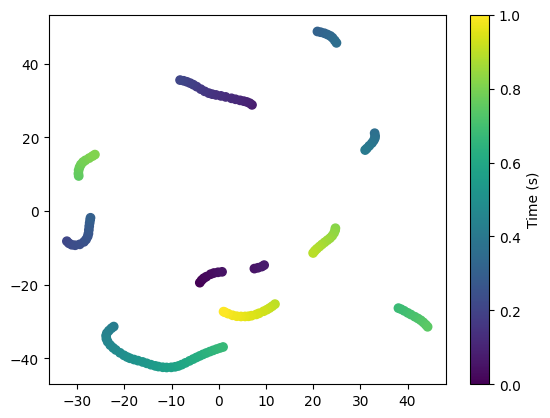

In [126]:
# Create a scatter plot with gradient colors
fig, ax = plt.subplots()
scatter = ax.scatter(sep_dataset["array_11"][:, 0], sep_dataset["array_11"][:, 1], c=np.linspace(0, 1, sep_dataset["array_11"].shape[0]), cmap='viridis')

# Add a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Time (s)')

# Display the plot
plt.show()

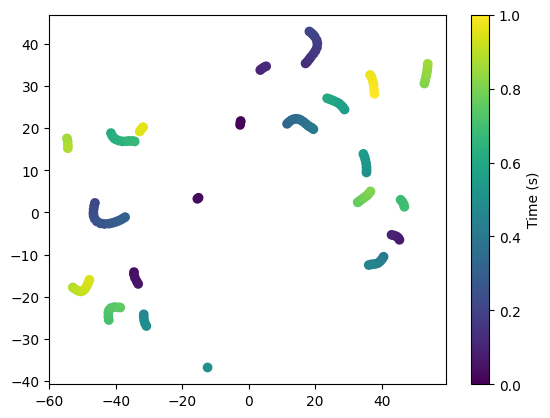

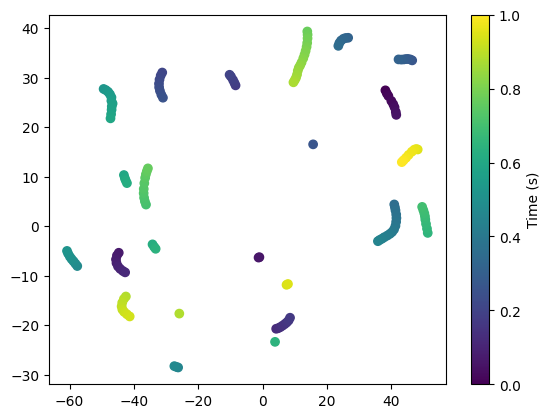

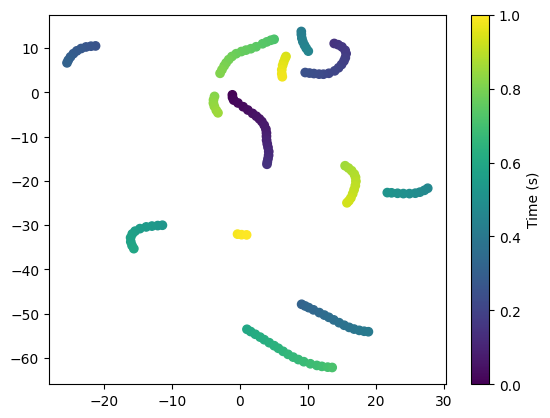

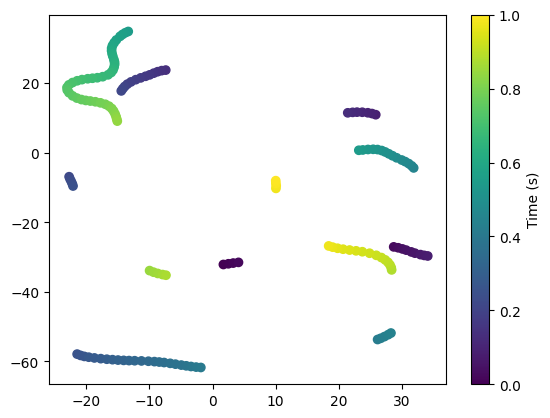

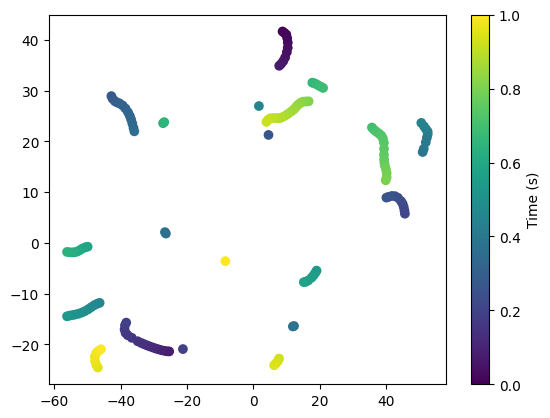

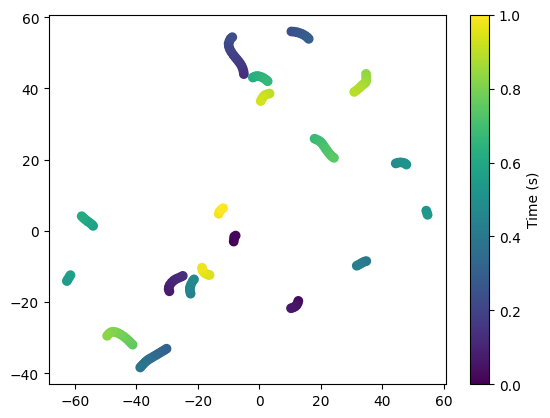

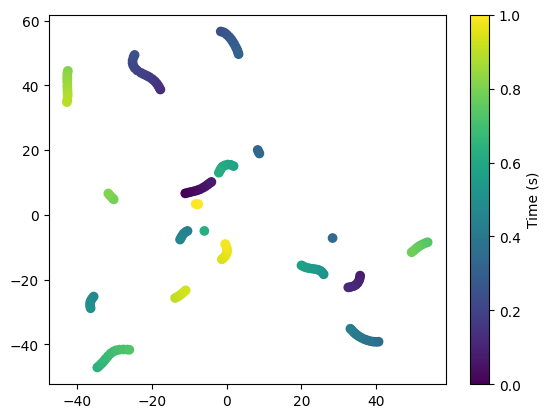

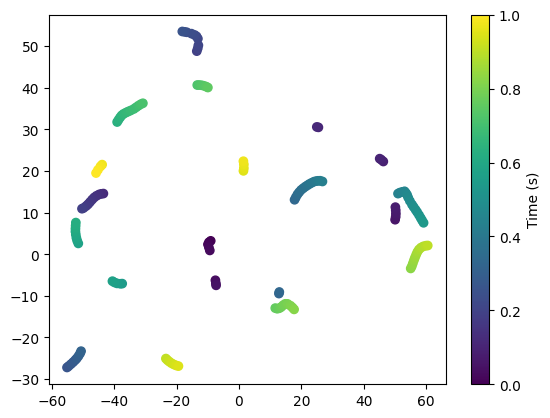

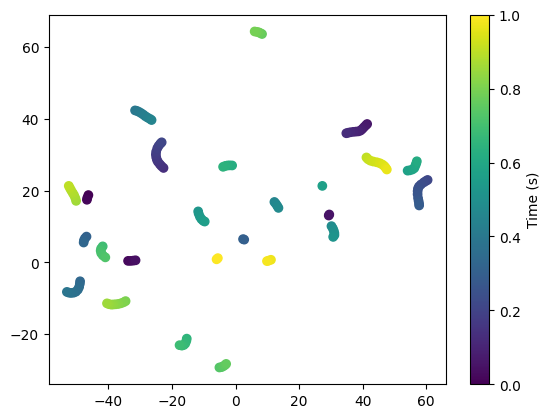

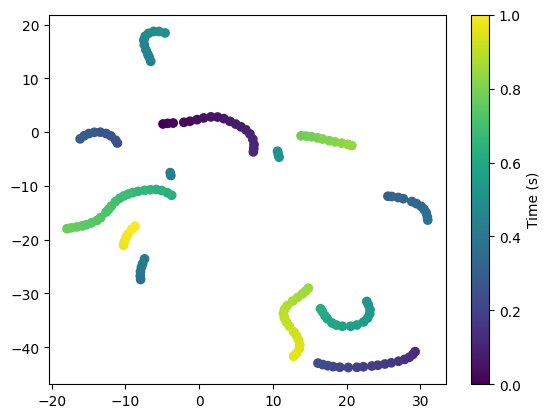

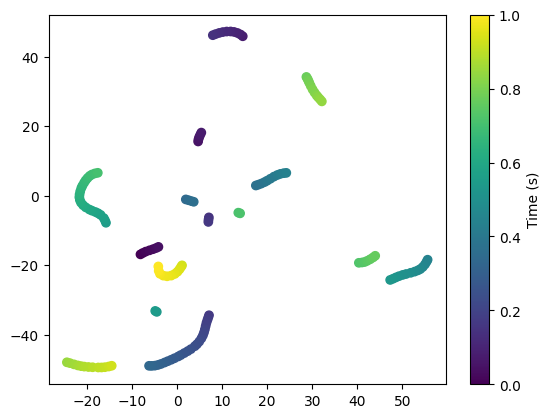

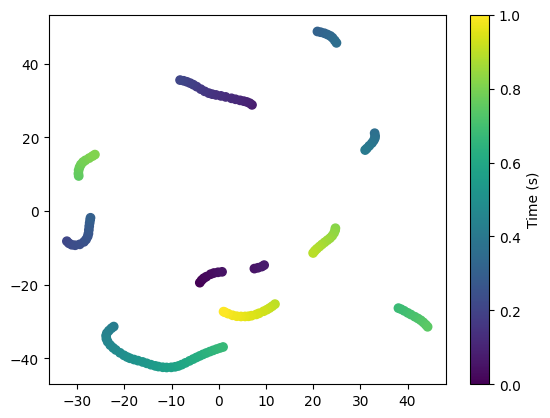

In [127]:
n_jumps = []
for key in sep_dataset.keys():
    _, rate = calculate_jumps(sep_dataset[key])
    n_jumps.append(rate)
    
    # Create a scatter plot with gradient colors
    fig, ax = plt.subplots()
    scatter = ax.scatter(sep_dataset[key][:, 0], sep_dataset[key][:, 1], c=np.linspace(0, 1, sep_dataset[key].shape[0]), cmap='viridis')

    # Add a color bar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Time (s)')

    # Display the plot
    plt.show()

In [128]:
averaged_values = [(n_jumps[i] + n_jumps[i + 1]) / 2 for i in range(0, len(n_jumps), 2)]


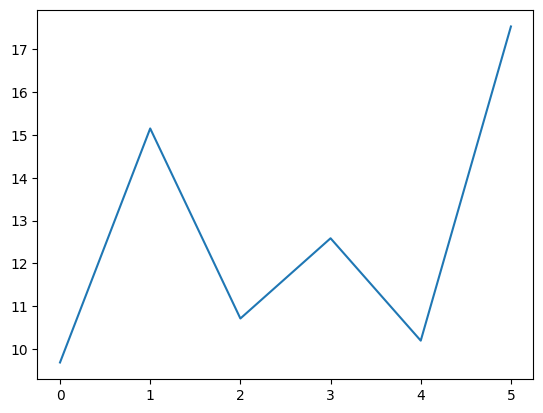

In [129]:
plt.plot(averaged_values)

In [109]:
sep_dataset.keys()

dict_keys(['array_0', 'array_1', 'array_2', 'array_3', 'array_4', 'array_5', 'array_6', 'array_7', 'array_8', 'array_9', 'array_10', 'array_11'])

In [19]:
jumps = calculate_jumps(tsne_output_1)

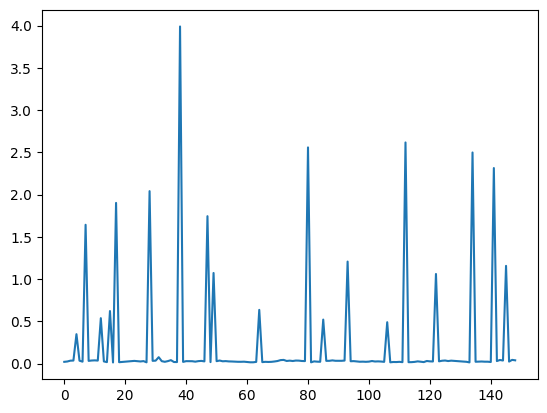

In [130]:
from scipy.spatial.distance import pdist, squareform
from scipy.signal import find_peaks

distances = np.diagonal(squareform(pdist(sep_dataset['array_7'], metric='mahalanobis')), 1)
find_peaks(distances, prominence = 1)

plt.plot(distances)

In [ ]:
main_dir = "/Users/abhay/Documents/School/Thesis/project/data/macaques/"

average_jumps = np.zeros((5, 12))
for i, d in enumerate(os.listdir(main_dir)):
    if d.startswith("."):
        continue

    sub_dir = os.path.join(main_dir, d)

    n_jumps = []
    for filename in os.listdir(sub_dir):
        if filename.startswith("."):
            continue

        path = os.path.join(sub_dir, filename)

        data = np.genfromtxt(path, delimiter=',', dtype=None)
        tsne_output = reduce_dim(data, 5)
        peaks, rate = calculate_jumps(tsne_output)

        n_jumps.append(jumps.size)
    
    average_jumps[i, :] = n_jumps

In [78]:
main_dir = "/Users/abhay/Documents/School/Thesis/project/data/marmosets/"

average_jumps = np.zeros((5, 12))
for i, d in enumerate(os.listdir(main_dir)):
    if d.startswith("."):
        continue

    sub_dir = os.path.join(main_dir, d)

    n_jumps = []
    for filename in os.listdir(sub_dir):
        if filename.startswith("."):
            continue

        path = os.path.join(sub_dir, filename)

        data = np.loadtxt(path, delimiter='\t', skiprows=1)
        tsne_output = reduce_dim(data, 5)
        peaks, rate = calculate_jumps(tsne_output)

        n_jumps.append(rate)
    
    average_jumps[i, :] = n_jumps

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 78: invalid start byte

In [47]:
average_jumps

array([[ 7.84210526, 10.83636364, 13.24444444, 10.27586207, 11.03703704,
        12.16326531,  9.3125    , 13.54545455, 11.68627451, 14.9       ,
        10.45614035, 15.28205128],
       [10.27586207, 14.53658537, 14.19047619, 13.86046512,  9.7704918 ,
        13.24444444, 14.19047619,  9.46031746,  9.7704918 , 14.19047619,
        11.24528302, 11.68627451],
       [13.24444444, 14.53658537, 14.19047619, 14.53658537, 14.9       ,
         8.89552239, 10.83636364,  9.46031746, 14.19047619,  9.61290323,
         9.16923077,  8.27777778],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [11.46153846,  9.93333333, 13.54545455, 12.41666667, 10.10169492,
         8.63768116, 12.16326531,  9.61290323, 10.10169492, 10.83636364,
        10.10169492,  9.16923077]])

In [56]:
main_dir = "/Users/abhay/Documents/School/Thesis/project/data/NHPStrokeData/"
average_jumps = np.zeros((5, 23))
for i, d in enumerate(os.listdir(main_dir)):
    if d.startswith("."):
        continue

    sub_dir = os.path.join(main_dir, d)

    n_jumps = []

    for filename in os.listdir(sub_dir):
        if filename.startswith("."):
            continue

        path = os.path.join(sub_dir, filename)
        
        data = np.loadtxt(path, delimiter=',', skiprows=1)
        tsne_output = reduce_dim(data, 5)
        jumps, rate = calculate_jumps(tsne_output)

        n_jumps.append(rate)
    
    average_jumps[i, :] = n_jumps

In [80]:
average_jumps

array([[ 7.74025974, 12.41666667, 13.24444444, 10.45614035, 12.16326531,
        10.83636364, 10.45614035, 13.54545455, 10.27586207, 13.24444444,
        10.64285714, 16.55555556],
       [ 9.46031746, 12.95652174, 16.55555556, 13.86046512,  9.7704918 ,
        11.68627451, 12.95652174, 11.03703704,  9.16923077, 12.95652174,
         8.89552239, 11.68627451],
       [13.24444444, 13.24444444, 16.10810811, 15.28205128, 15.68421053,
         9.46031746, 10.83636364,  8.27777778, 14.9       ,  9.61290323,
        10.10169492,  8.89552239],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

In [79]:
average_jumps

import pandas as pd

## convert your array into a dataframe
df = pd.DataFrame (average_jumps)

## save to xlsx file

filepath = 'my_excel_file_2.xlsx'

df.to_excel(filepath, index=False)